<a href="https://colab.research.google.com/github/mabdulghofur142/Data-Mining/blob/main/Capstone%20Project%201/Kelompok_CapStone_Project_01_F_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok CapStone Project 01 F**

| NIM | Nama |
|--------- | --------- |
| 11220940000010 |	SITI MAGFIROH |
| 11220940000018 |	SHAFIRA AL ZUHRA |
| 11220940000020 |	MUHAMMAD ABDUL GHOFUR |
| 11220940000025 |	MIYATUNNISA PUTRI SAMMA |
| 11220940000029 |	MUHAMMAD ANTHAR JAILANI PUTRA |


## loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Loading Data:
url = 'https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/main/alumni.csv'
df = pd.read_csv(url, sep=';')
df.head()

,Timestamp,Nomor Induk Mahasiswa (NIM),Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,No HP (WhatsApp):,email,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,...,Penghasilan,Univeritas,Tahun Masuk Studi Lanjut:,Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Bekerja di Institusi Saat ini:,Kota tempat bekerja saat Ini
0,7/3/2024 8:09:54,1,2019,2023,Februari,85267511845,1@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,NaN,NaN
1,6/4/2024 11:27:37,2,2018,2024,Mei,85267511846,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
2,6/4/2024 11:28:30,3,2018,2024,Mei,85267511847,3@gmail.com,6-12 bulan,Karyawan Swasta,NaN,...,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1,NaN,NaN
3,6/4/2024 11:28:55,4,2017,2024,Mei,85267511848,1@gmail.com,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
4,6/4/2024 11:29:04,5,2019,2024,Mei,85267511849,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN


## Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Timestamp                                                       435 non-null    object 
 1   Nomor Induk Mahasiswa (NIM)                                     435 non-null    int64  
 2   Tahun Masuk UIN Jakarta                                         435 non-null    object 
 3   Tahun Wisuda                                                    435 non-null    object 
 4   Bulan Wisuda                                                    435 non-null    object 
 5   No HP (WhatsApp):                                               435 non-null    int64  
 6   email                                                           435 non-null    object 
 7   Waktu Mendapatkan Pekerjaan:                         

In [3]:
#Mengubah nama kolom menjadi huruf kecil dan menghilangkan karakter ":" agar konsisten
for i in df.columns:
  j=i.lower()
  df.rename(columns={i: j}, inplace=True)

df.columns = df.columns.str.replace(':', '', regex=False)

In [4]:
# Mengubah nama kolom yang terlalu panjang dan typo
df.rename(columns={'nama jurusan/program studi setelah kuliah di fst uin jakarta ': 'program studi lanjutan',
                   'univeritas':'universitas'}, inplace=True)

In [5]:
df.columns

Index(['timestamp', 'nomor induk mahasiswa (nim)', 'tahun masuk uin jakarta',
       'tahun wisuda', 'bulan wisuda', 'no hp (whatsapp)', 'email',
       'waktu mendapatkan pekerjaan', 'status saat ini', 'tahun wirausaha',
       'bidang wirausaha', 'perusahaan', 'posisi', 'penghasilan',
       'universitas', 'tahun masuk studi lanjut', 'program studi lanjutan',
       'kesesuaian kurikulum', 'kesesuaian bidang ilmu', 'saran',
       'program studi', 'lama bekerja di institusi saat ini',
       'kota tempat bekerja saat ini'],
      dtype='object')

In [6]:
# memeriksa entri data di tiap variabel, apakah ada noise
def cekdf(df):
  for i in df.columns:
    print("\n",i)
    print(df[i].unique())
cekdf(df)


 timestamp
['7/3/2024 8:09:54' '6/4/2024 11:27:37' '6/4/2024 11:28:30'
 '6/4/2024 11:28:55' '6/4/2024 11:29:04' '6/4/2024 11:30:08'
 '6/4/2024 11:30:54' '6/4/2024 11:34:17' '6/4/2024 12:04:36'
 '6/4/2024 12:07:40' '6/5/2024 15:37:22' '6/6/2024 8:37:12'
 '6/25/2024 10:49:22' '6/26/2024 14:36:05' '6/26/2024 14:39:47'
 '6/26/2024 14:42:03' '6/26/2024 14:43:08' '6/26/2024 14:45:23'
 '6/26/2024 14:45:32' '6/26/2024 14:45:58' '6/26/2024 14:47:28'
 '6/26/2024 14:49:44' '6/26/2024 14:50:35' '6/26/2024 15:01:54'
 '6/26/2024 15:10:17' '6/26/2024 15:17:35' '6/26/2024 15:22:42'
 '6/26/2024 16:09:37' '6/26/2024 16:10:16' '6/26/2024 16:10:46'
 '6/26/2024 16:14:26' '6/26/2024 16:16:25' '6/26/2024 16:27:06'
 '6/26/2024 16:30:00' '6/26/2024 16:41:17' '6/26/2024 16:45:41'
 '6/26/2024 17:02:12' '6/26/2024 17:12:49' '6/26/2024 17:39:52'
 '6/26/2024 17:43:43' '6/26/2024 17:45:31' '6/26/2024 18:24:17'
 '6/26/2024 18:27:04' '6/26/2024 18:30:17' '6/26/2024 18:31:02'
 '6/26/2024 18:34:58' '6/26/2024 18:41:10'

### Penghapusan Kolom

- Menghapus Kolom 'lama bekerja di institusi saat ini', 'kota tempat bekerja saat ini' karena kolom kosong.
- Menghapus Kolom 'nomor induk mahasiswa (nim)', 'no hp (whatsapp)', 'email' karena data terlalu beragam dan tidak dapat digunakan dalam pemberian insight.

In [7]:
df = df.drop(['lama bekerja di institusi saat ini', 'kota tempat bekerja saat ini', 'nomor induk mahasiswa (nim)', 'no hp (whatsapp)', 'email'], axis=1)

### Mengoreksi data secara umum untuk keseluruhan

Diperoleh banyak entri di beberapa variabel berupa nan, '-', 'tidak ada', '—', ' '. maka dilakukan replace pada semua entri tersebut sebagai None untuk membagusi data.



In [8]:
def replace_umum(df):
  col = df.columns
  for i in col:
    df[i] = df[i].replace([np.nan, '-', 'tidak ada', '—', ' '], None)

replace_umum(df)

### Koreksi data kolom tahun masuk uin jakarta

In [9]:
# periksa data noise pada 'tahun masuk uin jakarta'
df[df['tahun masuk uin jakarta'].isin(['2019 Genap','206','1,11809E+13','208'])]

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
87,6/28/2024 15:33:47,2019 Genap,2023,Agustus,Kurang dari 3 bulan.,ASN/PNS,None,None,Pusat Laboratorium Terpadu - UIN Syarif Hidaya...,Koordinator Bidang Lab. IPA dan Agribisnis,8,None,None,None,5,5,None,Agribisnis S2
88,6/28/2024 15:36:57,206,2010,Mei,3-6 Bulan,Karyawan Swasta,None,None,PT. Aladin Bank Syariah,ETL Developer,18,None,None,None,4,3,Lebih banyak praktik lapangan,Matematika
183,6/29/2024 14:21:30,"1,11809E+13",2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,None,None,None,None,None,None,None,None,4,4,None,Teknik Informatika
204,6/30/2024 5:30:03,208,2023,Agustus,3-6 Bulan,Karyawan Swasta,None,None,Total Logsitics,Call Center,4,None,None,None,4,2,None,Teknik Informatika


Penanganan:
- pada 2019 genap, karena kesalahan format dan karena prodi nya adalah S2, maka sangat memungkinkan jika masuk di semester genap, jadi tahunnya adalah 2019.
- pada 206, karena tahun wisuda 2010 maka yang memungkinkan adalah tahun masuk 2006
- pada 1,11809E+13, adalah format NIM asli mahasiswa UIN jakarta (ex: 11220940000020) dimana digit 3 dan 4 menandakan tahun masuk, maka tahun masuk data ini adalah 2018
- pada 208, karena tahun wisuda 2023 maka yang memungkinkan adalah tahun masuk 2018

In [10]:

df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].replace({
    '2019 Genap': 2019,  # Mengganti '2019 Genap' dengan 2019
    '206': 2006,         # Mengganti '206' dengan 2006
    '1,11809E+13': 2018, # Mengganti NIM dengan tahun masuk 2018
    '208': 2018          # Mengganti '208' dengan tahun masuk 2018
})

# periksa ulang data noise pada 'tahun masuk uin jakarta'
df.iloc[[87,88,183,204]]

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
87,6/28/2024 15:33:47,2019,2023,Agustus,Kurang dari 3 bulan.,ASN/PNS,None,None,Pusat Laboratorium Terpadu - UIN Syarif Hidaya...,Koordinator Bidang Lab. IPA dan Agribisnis,8,None,None,None,5,5,None,Agribisnis S2
88,6/28/2024 15:36:57,2006,2010,Mei,3-6 Bulan,Karyawan Swasta,None,None,PT. Aladin Bank Syariah,ETL Developer,18,None,None,None,4,3,Lebih banyak praktik lapangan,Matematika
183,6/29/2024 14:21:30,2018,2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,None,None,None,None,None,None,None,None,4,4,None,Teknik Informatika
204,6/30/2024 5:30:03,2018,2023,Agustus,3-6 Bulan,Karyawan Swasta,None,None,Total Logsitics,Call Center,4,None,None,None,4,2,None,Teknik Informatika


### Koreksi data kolom tahun wisuda

In [11]:
# periksa data noise pada 'tahun wisuda'
df[df['tahun wisuda']=='22 Oktober 2020']

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
126,6/28/2024 22:31:24,2016,22 Oktober 2020,Februari,6-12 bulan,Karyawan Swasta,None,None,None,None,None,None,None,None,5,5,None,Fisika


Terdapat ketidaksesuaian antara tahun wisuda dan bulan wisuda. Dilampir dari website https://uinjkt.ac.id tidak terdapat wisuda pada tanggal 22 Oktober 2020, namun pada https://uinjkt.ac.id/index.php/id/hari-pertama-wisuda-115-lulusan-fitk-jadi-lulusan-terbaik-universitas terdapat informasi bahwa wisuda tanggal 22 februari 2020. maka tahun wisudanya haruslah 2020.

In [12]:
df['tahun wisuda'] = df['tahun wisuda'].replace("22 Oktober 2020", "2020")

# periksa ulang data noise pada 'tahun wisuda'
df.iloc[126]

,126
timestamp,6/28/2024 22:31:24
tahun masuk uin jakarta,2016
tahun wisuda,2020
bulan wisuda,Februari
waktu mendapatkan pekerjaan,6-12 bulan
status saat ini,Karyawan Swasta
tahun wirausaha,None
bidang wirausaha,None
perusahaan,None
posisi,None


### Koreksi data kolom waktu mendapatkan pekerjaan

pada kolom 'waktu mendapatkan pekerjaan' memiliki isi unik seperti berikut: ['Belum mendapatkan pekerjaan' '6-12 bulan' 'Kurang dari 3 bulan.'
 '3-6 Bulan' 'lebih dari 12 bulan.' 'Tidak berencana mencari pekerjaan'
 '1' '5' '6' '>12 bulan' '3' '2' '9' '10' '4' '12']

  namun jika disederhanakan maka hanya ada ['Belum mendapatkan pekerjaan' '6-12 bulan' 'Kurang dari 3 bulan.'
 '3-6 Bulan' 'lebih dari 12 bulan.' 'Tidak berencana mencari pekerjaan']

In [13]:
#buat fungsi untuk replace
def replace_khusus(df, kolom, ubahan):
  for i in range(len(ubahan)):
    df[kolom] = df[kolom].replace(ubahan[i][1],ubahan[i][0])

In [14]:
# melakukan koreksi data
kategori_mapping = [
    ['Kurang dari 3 bulan.', ['1','2']] ,
    ['3-6 Bulan',['3','4','5']],
    ['6-12 bulan',['6','7','8','9','10','11','12']],
    ['lebih dari 12 bulan.',['>12 bulan']]]

replace_khusus(df,'waktu mendapatkan pekerjaan',kategori_mapping)

### Koreksi data kolom penghasilan

Pada kolom 'penghasilan' terdapat beberapa noise, [np.nan ,'11.000','5.000.000','7.000','2.500' ,'300.000','6.700.000', '250']], kemudian akan diperiksa data tersebut:

In [15]:
# periksa data noise pada 'penghasilan'
df[df['penghasilan'].isin(['11.000','5.000.000','7.000','2.500' ,'300.000','6.700.000', '250'])]

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
52,6/26/2024 19:10:27,2019,2023,November,Kurang dari 3 bulan.,ASN/PNS,None,None,BAPANAS,Kepala Sub Koordinator,11.000,Belum,None,None,5,5,Semoga FST UIN menghasilkan lulusan handal yan...,Agribisnis S2
89,6/28/2024 15:51:11,2017,2023,Februari,Kurang dari 3 bulan.,Karyawan Swasta,None,None,PT. Karya Utama Integritas,Research Executive,5.000.000,None,None,None,5,3,None,Matematika
91,6/28/2024 16:18:42,2015,2020,Mei,lebih dari 12 bulan.,Karyawan Swasta,None,None,Hypernet Technologies,Sales Performance Monitoring,7.000,Kwik Kian Gie School of Business (Jakarta),2020,Magister Management,4,4,- Fasilitas kampus yang modern dan lingkungan ...,Matematika
139,6/29/2024 12:17:18,2016,2023,Agustus,Kurang dari 3 bulan.,Karyawan Swasta,None,None,Klinik H. Sumadi Sumiti,Back Office,2.500,None,None,None,3,2,Semoga kedepannya lebih banyak workshop untuk ...,Teknik Informatika
220,7/1/2024 19:38:00,2019,2023,November,Kurang dari 3 bulan.,Pengajar,None,None,SMP BINA SEJAHTERA DAN PT GOODSALE TECH,Guru dan Host Live Streaming,5.000.000,None,None,None,4,4,Semoga pengembangan nya makin keren lagi dan s...,Biologi
248,7/2/2024 11:58:15,2019,2024,Juni,Belum mendapatkan pekerjaan,Wirausaha,2024,Menjual tiket saat ada suatu acara,None,None,300.000,None,None,None,5,4,None,Prodi Kimia
250,7/2/2024 12:08:32,2019,2024,Februari,Kurang dari 3 bulan.,Karyawan Swasta,None,None,PT. L'essential,Staff QC,5.000.000,None,None,None,4,4,semoga prodi kimia banyak menjalin kerjasama d...,Prodi Kimia
280,7/2/2024 22:13:05,2019,2024,Februari,Kurang dari 3 bulan.,Karyawan Swasta,None,None,PT. Periplus Bookindo,Assistant Store Manager,6.700.000,None,None,None,2,1,semoga kedepannya menjadi akses untuk membuka ...,Prodi Biologi
318,7/10/2024 11:49:15,2018,2023,Februari,3-6 Bulan,Wirausaha,2024,makanan ringan dan pernak pernik,None,None,250,None,None,None,2,2,tidak ada sudah cukup,Prodi Biologi


- pada ['11.000', '7.000','2.500', '250'], dengan pekerjaan yang ada data-data tersebut tidak meyakinkan jika dalam jutaan. maka sangat memungkinkan adanya salah format dimana data dalam ribuan. jadi haruslah kita ubah kembali menjadi jutaan.
- pada ['5.000.000','300.000','6.700.000'], dengan pekerjaan yang ada data-data tersebut tidak meyakinkan jika dalam jutaan. maka sangat memungkinkan adanya salah format dimana data masih dalam satuan rupiah. jadi haruslah kita ubah kembali menjadi jutaan.


In [16]:
kategori_mapping = {
    '11.000': '11',
     '7.000' : '7',
     '5.000.000': '5',
     '300.000': '0.3',
     '6.700.000': '6.7',
     '2.500': '2.5',
    '250':'0.25'}

# Menerapkan mapping ke kolom
df['penghasilan'] = df['penghasilan'].replace(kategori_mapping)

# Lihat hasil normalisasi
print(df['penghasilan'].unique())

[None '5' '5.4' '12' '6' '8' '4.8' '10' '7' '1' '25' '9' '6.2' '4' '15'
 '11' '3' '5.2' '18' '14' '32' '49' '4.6' '3.2' '6.5' '2.5' '5.5' '5.3'
 '35' '6.7' '17' '2' '20' '1.5' '0.3' '3.5' '30' '0.25' '50' '2.5 ']


### Koreksi data kolom status saat ini

In [17]:
#Kolom Status saat ini
#Menyamakan kategori pada kolom ini
map = [['Internship',['Internship ','internship','Internship','Magang','mengikuti pelatihan']],
['Freelance',['Freelance', 'Free Lancer dan Co-Founder', 'Pekerja Harian Lepas', 'Part time','Content Creator']],
['Melamar Pekerjaan',['Belum mendapat pekerjaan', 'Menganggur', 'Akan mencari pekerjaan', 'Proses Wisuda', 'sedang mencari kerja']],
['melanjutkan studi',['Masih dalam pendidikan untuk persyaratan pekerjaan','Mendaftar studi magister','Mahasiswa', 'Melanjutkan Studi']],
['Karyawan Swasta',['Mendapatkan Pekerjaan', 'Karyawan ','Pegawai Tetap ', 'Staf', 'Operator Sekolah']],
['Karyawan BUMN',['Pegawai tidak tetap instansi pemerintah']],
['Researcher',['Staff laboratorium ','Research Assistant']],
['Pengajar',['Pengajar les dan wirausaha', 'Mengelola Yayasan Pendidikan']],
['Karyawan Instansi Milik Pemerintah',['Karyawan BUMD', 'Karyawan BUMN']]]

replace_khusus(df,'status saat ini',map)

# Lihat hasil normalisasi
print(df['status saat ini'].unique())

['Melamar Pekerjaan' 'Karyawan Swasta' 'Pengajar' 'ASN/PNS'
 'Karyawan Instansi Milik Pemerintah' 'melanjutkan studi' 'Wirausaha' None
 'Internship' 'Mengurus Rumah Tangga' 'Freelance' 'Researcher']


### Koreksi data kolom Universitas

In [18]:
# Koreksi nama universitas agar seragam
universitas_mapping = {
    '5.000.000' : None, # noise penghasilan di kolom universitas
    'IPB ': 'IPB',
    'IPB University': 'IPB',
    'Institut Pertanian Bogor': 'IPB',
    'ITB Bandung': 'ITB',
    'Institut Teknologi Bandung': 'ITB',
    'Universitas Gadjah Mada': 'UGM',
    'Universitas Indonesia': 'UI',
    'Universitas Indonesia ': 'UI',
    'Universitas Indonesia (Depok)': 'UI',
    'Universitas Indonesia, Depok': 'UI',
    'Uin': 'UIN',
    'Universitas Andalas, Padang ': 'Universitas Andalas',
    'Universitas Krisnadwipanaya (UNKRIS)': 'UNKRIS',
    'Kwik Kian Gie School of Business (Jakarta)': 'Kwik Kian Gie School of Business',
    'Innopolis University, Tatarstan, Russia': 'Innopolis University',
    'Universitas Mercubuana': 'Universitas Mercubuana'}

# Mengganti nama universitas berdasarkan dictionary
df['universitas'] = df['universitas'].replace(universitas_mapping)

In [19]:
df[df["universitas"]=='UIN']

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
82,6/28/2024 14:59:29,2019,2021,Agustus,Tidak berencana mencari pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10,UIN,2019,Mag,5,5,Lebih di percepat,Agribisnis S2


Pada data Universitas studi lanjut di UIN berisikana prodi MAG (Agribisnis S2), dimana pengisi adalah alumni prodi Agribisnis S2, sehingga itu bukan studi lanjut dari kuliah sebelumnya di UIN Jakarta. Maka bisa kita hapus sebagai none

In [20]:
# Menggunakan .loc untuk melakukan pengubahan nilai di tempat
df.loc[df["universitas"] == 'UIN', 'tahun masuk studi lanjut'] = None
df.loc[df["universitas"] == 'UIN', 'program studi lanjutan'] = None
df.loc[df["universitas"] == 'UIN', 'universitas'] = None


### Koreksi data kolom Program Studi

Mengoreksi format penamaan program studi yang ada

In [21]:
map2 = [['Prodi Kimia',['Kimia']],
['Prodi Biologi',['Biologi']],
['Prodi Matematika',['Matematika']],
['Prodi Agribisnis S1',['Agribisnis S1', 'Prodi Agribisnis']],
['Prodi Teknik Informatika',['Prodi TI', 'Teknik Informatika']],
['Prodi Agribisnis S2',['Prodi MAG', 'Agribisnis S2']],
['Prodi Fisika',['Fisika']]]
replace_khusus(df,'program studi',map2)

### Koreksi data kolom Tahun Masuk Studi Lanjut

In [22]:
df[df['tahun masuk studi lanjut']=='Baru mau mendaftar di semester genap']
# Terdapat data 'Baru mau mendaftar di semester genap' yang masih berupa rencana dan belum fix pada data, maka dapat dikoreksi sebagai None

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
329,7/10/2024 15:12:23,2018,2023,Agustus,Kurang dari 3 bulan.,melanjutkan studi,2023,Jasa Wisata Alam dan Jasa Laundry Sepatu,"Sudah tidak bekerja, perusahaan sebelumnya (Mu...",Laboran,5,Baru mau mendaftar di semester genap,Baru mau mendaftar di semester genap,Baru mau mengambil jurusan Management sustaina...,2,4,Masih kurang dalam bidang spesifik ekologi dan...,Prodi Biologi


In [23]:
# Menggunakan .loc untuk melakukan pengubahan nilai di tempat
df.loc[df['tahun masuk studi lanjut']=='Baru mau mendaftar di semester genap', 'tahun masuk studi lanjut'] = None
df.loc[df['tahun masuk studi lanjut']=='Baru mau mendaftar di semester genap', 'program studi lanjutan'] = None
df.loc[df['tahun masuk studi lanjut']=='Baru mau mendaftar di semester genap', 'universitas'] = None


In [24]:
# # Terdapat data '2025' yang masih berupa rencana dan belum fix pada data, maka dapat dikoreksi sebagai None
df[df['tahun masuk studi lanjut']=='2025']

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi
274,7/2/2024 16:45:48,2019,2023,Agustus,3-6 Bulan,Pengajar,None,None,Yayasan Nurul Ikhlas,Staff,25,"IPB, UGM, UI",2025,"Biokimia, Magister Kimia, ilmu Kimia",5,5,Pesan: Pesan dan harapan saya agar prodi kimia...,Prodi Kimia


In [25]:
# Menggunakan .loc untuk melakukan pengubahan nilai di tempat
df.loc[df['tahun masuk studi lanjut']=='2025', 'tahun masuk studi lanjut'] = None
df.loc[df['tahun masuk studi lanjut']=='2025', 'program studi lanjutan'] = None
df.loc[df['tahun masuk studi lanjut']=='2025', 'universitas'] = None


In [26]:
# meng-format ulang data yang melanjutkan studi hingga S3
mapping = {
    '2016, 2024': '[2016, 2024]',
    '2012 ITB, dan 2019 UGM': '[2012, 2019]',
    'S2: 2019, S3: 2023':'[2019, 2023]'
}
df['tahun masuk studi lanjut'] = df['tahun masuk studi lanjut'].replace(mapping)

### periksa duplikat

In [27]:
df.duplicated().sum()

0

### Koreksi tipe data

Koreksi tipe data sengaja dilakukan setelah perlakuan noise karena banyaknya data yang tidak sesuai format dan tidak bisa di ubah tipe nya

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   timestamp                    435 non-null    object
 1   tahun masuk uin jakarta      435 non-null    object
 2   tahun wisuda                 435 non-null    object
 3   bulan wisuda                 435 non-null    object
 4   waktu mendapatkan pekerjaan  435 non-null    object
 5   status saat ini              423 non-null    object
 6   tahun wirausaha              30 non-null     object
 7   bidang wirausaha             31 non-null     object
 8   perusahaan                   221 non-null    object
 9   posisi                       225 non-null    object
 10  penghasilan                  206 non-null    object
 11  universitas                  31 non-null     object
 12  tahun masuk studi lanjut     27 non-null     object
 13  program studi lanjutan       30 non

In [29]:

# Mengonversi kolom yang berisi tahun atau tanggal menjadi tipe datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['tahun masuk uin jakarta'] = pd.to_numeric(df['tahun masuk uin jakarta'], errors='coerce')
df['tahun wisuda'] = pd.to_numeric(df['tahun wisuda'], errors='coerce')
df['tahun wirausaha'] = pd.to_numeric(df['tahun wirausaha'], errors='coerce')
df['tahun masuk studi lanjut'] = pd.to_numeric(df['tahun masuk studi lanjut'], errors='coerce')

# kolom numerik
df['penghasilan'] = pd.to_numeric(df['penghasilan'], errors='coerce')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    435 non-null    datetime64[ns]
 1   tahun masuk uin jakarta      435 non-null    int64         
 2   tahun wisuda                 435 non-null    int64         
 3   bulan wisuda                 435 non-null    object        
 4   waktu mendapatkan pekerjaan  435 non-null    object        
 5   status saat ini              423 non-null    object        
 6   tahun wirausaha              30 non-null     float64       
 7   bidang wirausaha             31 non-null     object        
 8   perusahaan                   221 non-null    object        
 9   posisi                       225 non-null    object        
 10  penghasilan                  206 non-null    float64       
 11  universitas                  31 non-null     

### Membuat variabel baru

In [31]:
# Variabel lama studi dari selisi tahun wisuda dengan tahun masuk studi
df["lama studi"] = df["tahun wisuda"] - df["tahun masuk uin jakarta"]

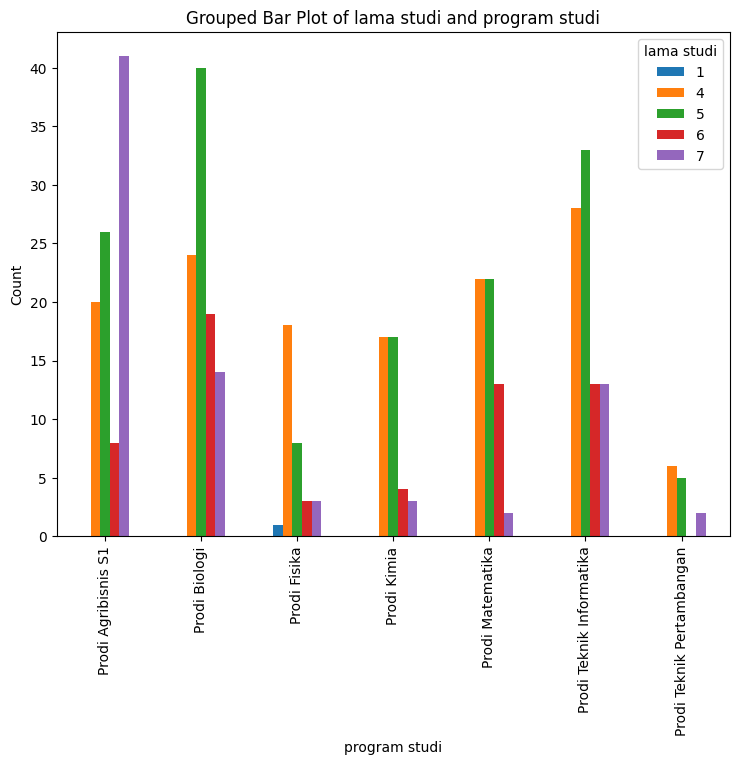

In [32]:
# Memeriksa ada nya Noise di lama studi
dfS1=df[df["program studi"]!='Prodi Agribisnis S2']

# Assuming 'dfS1' is your DataFrame
counts = dfS1.groupby(["program studi","lama studi"]).size().unstack()

# Create the grouped bar plot using pandas plot function
counts.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Plot of lama studi and program studi')
plt.xlabel('program studi')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title='lama studi')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [33]:
df[df["lama studi"] == 1]

,timestamp,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi,lama studi
98,2024-06-28 17:09:05,2009,2010,Agustus,Kurang dari 3 bulan.,ASN/PNS,NaN,None,BMKG,Ketua Tim Bidang Geofisika Potensial,14.0,"ITB Bandung, UGM",NaN,Sains kebumian dan geografi,4,4,None,Prodi Fisika,1


kemungkinan ada nya salah input data pada lama studi 1 tahun, karena untuk memenuhi SKS sebagai syarat lulus biasanya terpenuhi dengan waktu lebih dari 3 tahun. pengecualian jika saat itu ada kebijakan khusus di program studi yang bersangkutan. namun kami akan menganggap data tersebut sebagai noise, oleh karena itu data tersebut dihapus.

In [34]:
df = df[df["lama studi"] != 1]

In [35]:
# Membuat variabel baru selisih_bulan sebagai selisih waktu mengisi gform dengan waktu wisuda
# Dictionary untuk mengonversi nama bulan ke angka bulan
bulan_dict = {
    'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04',
    'Mei': '05', 'Juni': '06', 'Juli': '07', 'Agustus': '08',
    'September': '09', 'Oktober': '10', 'November': '11', 'Desember': '12'
}

# Mengonversi nama bulan menjadi angka menggunakan .map()
df['Bulan_Angka'] = df['bulan wisuda'].map(bulan_dict)

# Gabungkan tahun dan bulan menjadi satu kolom
df['tahun-bulan wisuda'] = df['tahun wisuda'].astype(str) + '-' + df['Bulan_Angka']

# Membuat satu kolom 'tahun-bulan' dalam format YYYY-MM
df['tahun-bulan'] = df['timestamp'].dt.strftime('%Y-%m')

df['tahun-bulan wisuda'] = pd.to_datetime(df['tahun-bulan wisuda'], errors='coerce')
df['tahun-bulan'] = pd.to_datetime(df['tahun-bulan'], errors='coerce')

# Hitung selisih dalam format timedelta
df['Selisih'] = df['tahun-bulan']-df['tahun-bulan wisuda']
df['Selisih'] = df['Selisih'].dt.days
df['selisih bulan'] = df['Selisih']

# Ekstrak tahun dan bulan dari selisih
for i in df['Selisih']:
  if i>0:
    df.loc[df['Selisih']==i, 'selisih bulan'] = i // 30
  else:
    df.loc[df['Selisih']==i, 'selisih bulan'] = i // 31

# Hapus kolom yang tidak diperlukan lagi
df = df.drop(columns=['Bulan_Angka', 'bulan wisuda','tahun wisuda','Selisih', 'tahun-bulan'])

<ipython-input-35-70fc286df692>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bulan_Angka'] = df['bulan wisuda'].map(bulan_dict)
<ipython-input-35-70fc286df692>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun-bulan wisuda'] = df['tahun wisuda'].astype(str) + '-' + df['Bulan_Angka']
<ipython-input-35-70fc286df692>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [36]:
# memeriksa status alumni sebelum wisuda
df[df["selisih bulan"]<0]["status saat ini"].value_counts()

,count
status saat ini,
Melamar Pekerjaan,55
Karyawan Swasta,12
Wirausaha,4
Freelance,3
Pengajar,3
melanjutkan studi,1
Mengurus Rumah Tangga,1


In [37]:
df[df["status saat ini"]=="melanjutkan studi"][df["selisih bulan"]<0]

<ipython-input-37-a929176ed75e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["status saat ini"]=="melanjutkan studi"][df["selisih bulan"]<0]


,timestamp,tahun masuk uin jakarta,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas,tahun masuk studi lanjut,program studi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,program studi,lama studi,tahun-bulan wisuda,selisih bulan
381,2024-08-09 08:36:55,2019,Belum mendapatkan pekerjaan,melanjutkan studi,NaN,None,None,None,NaN,None,NaN,None,5,5,None,Prodi Agribisnis S1,5,2024-11-01,-3


status "melanjutkan studi" tidak dapat dilakukan sebelum wisuda, maka kita periksa datanya dan ternyata memang tidak terdapat informasi mengenai program studi lanjut yang diambil, maka dari itu masuk ke dalam None.

In [38]:
df.loc[381, "status saat ini"] = None

### memeriksa Outlier

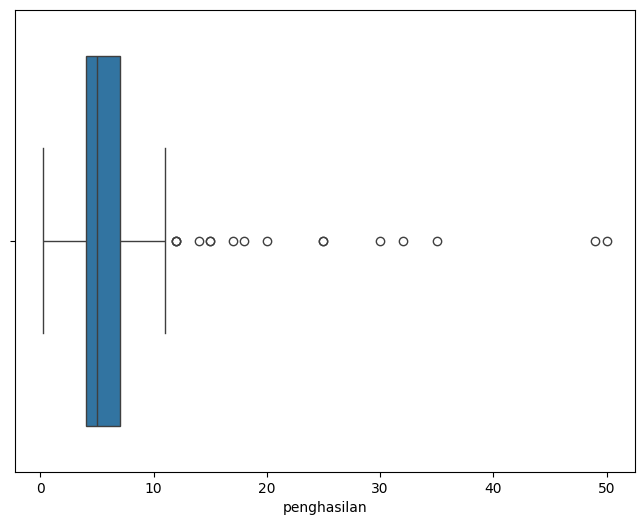

In [39]:
# Memeriksa outlier menggunakan boxplot untuk penghasilan
plt.figure(figsize=(8, 6))
sns.boxplot(x='penghasilan', data=df)
plt.show()


In [40]:
# Memisahkan dataframe outlier atas
# Langkah 1: Hitung Q1 dan Q3
Q1 = df['penghasilan'].quantile(0.25)
Q3 = df['penghasilan'].quantile(0.75)

# Langkah 2: Hitung IQR
IQR = Q3 - Q1

# Langkah 3: Tentukan batas bawah dan batas atas
batas_bawah_penghasilan = Q1 - 1.5 * IQR
batas_atas_penghasilan = Q3 + 1.5 * IQR

# Langkah 4: Filter baris yang merupakan outlier
outlier_penghasilan = df[(df['penghasilan'] > batas_atas_penghasilan)]
outlier_penghasilan.T



,16,39,50,88,101,103,116,119,165,175,185,222,238,274,304,337
timestamp,2024-06-26 14:43:08,2024-06-26 17:43:43,2024-06-26 19:03:12,2024-06-28 15:36:57,2024-06-28 17:16:34,2024-06-28 17:24:53,2024-06-28 18:36:30,2024-06-28 19:32:48,2024-06-29 13:08:55,2024-06-29 13:22:24,2024-06-29 14:27:23,2024-07-02 08:28:56,2024-07-02 11:43:24,2024-07-02 16:45:48,2024-07-09 19:33:09,2024-07-10 17:48:31
tahun masuk uin jakarta,2008,2008,2021,2006,2005,2016,2014,2009,2018,2019,2016,2016,2017,2019,2013,2019
waktu mendapatkan pekerjaan,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Tidak berencana mencari pekerjaan,3-6 Bulan,Kurang dari 3 bulan.,6-12 bulan,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Kurang dari 3 bulan.,Kurang dari 3 bulan.,3-6 Bulan,Tidak berencana mencari pekerjaan,Kurang dari 3 bulan.
status saat ini,Karyawan Swasta,Karyawan Swasta,ASN/PNS,Karyawan Swasta,Karyawan Swasta,Karyawan Instansi Milik Pemerintah,Karyawan Swasta,Karyawan Swasta,Karyawan Swasta,Karyawan Swasta,Karyawan Swasta,Karyawan Swasta,Wirausaha,Pengajar,Wirausaha,Wirausaha
tahun wirausaha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,2018.0,2019.0
bidang wirausaha,None,None,None,None,None,None,None,None,None,None,None,None,Textile,None,Digital printing,Kue
perusahaan,None,PT. DKSH Indonesia,Kementerian Pertanian,PT. Aladin Bank Syariah,Medco Energi,PT Bank Mandiri (Persero) Tbk,PT MEGA CAPITAL SEKURITAS,Siemens Energy Indonesia,Puskesmas Tegal Angus Dinas Kesehatan Kabupate...,DiMuto.io,PT. Grab Teknologi Indonesia,"Dinas Perindustrian, Perdagangan, Koperasi, Us...",None,Yayasan Nurul Ikhlas,None,LAPIS TALAS BOGOR AND BEJI
posisi,Compliance APU PPT Senior Associate,Manager Technical Lab,Koodinator Kelompok Subtansi Kelembagaan Pembi...,ETL Developer,Electrical &Instrument Inspector,Cust Service Administrative,Act Equity Coordinator,Automation Engineer,Operator Keuangan,Automated QA Engineer,Software Engineer (iOS),Staff,None,Staff,None,Owner
penghasilan,12.0,25.0,15.0,18.0,32.0,49.0,12.0,15.0,35.0,14.0,17.0,12.0,20.0,25.0,30.0,50.0
universitas,None,None,None,None,None,None,None,None,None,None,None,None,None,"IPB, UGM, UI",None,None


## Visualisasi


### Visualisasi 1

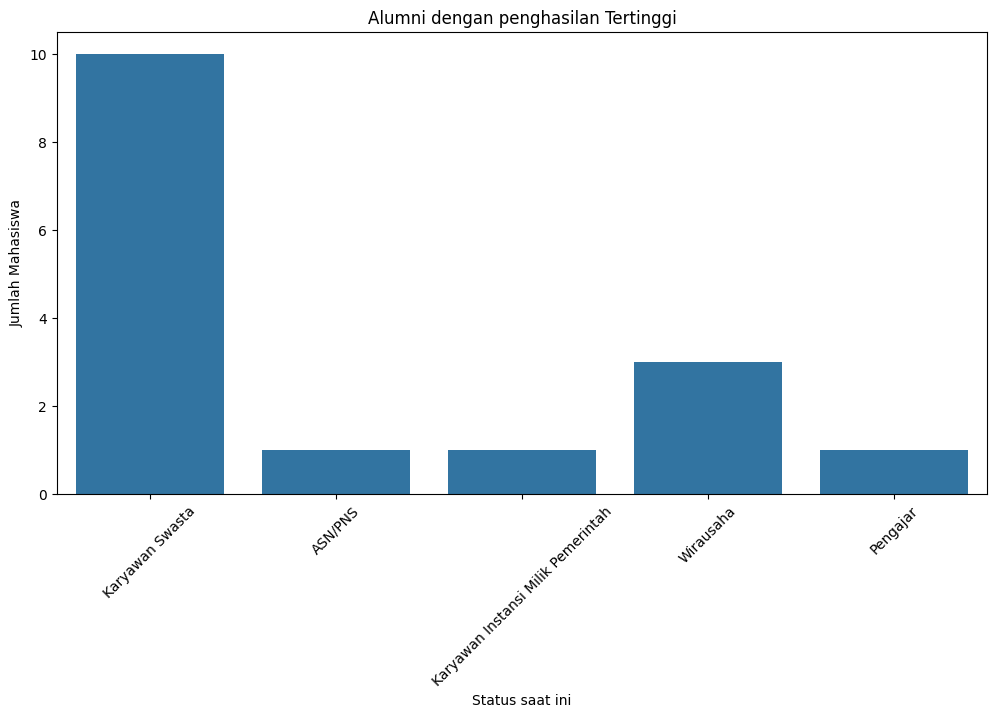

In [41]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='status saat ini', data=outlier_penghasilan)
plt.title('Alumni dengan penghasilan Tertinggi')
plt.xlabel('Status saat ini')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-4095c9f7635e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df[df["selisih bulan"]<=0][df["status saat ini"] != 'Melamar Pekerjaan']


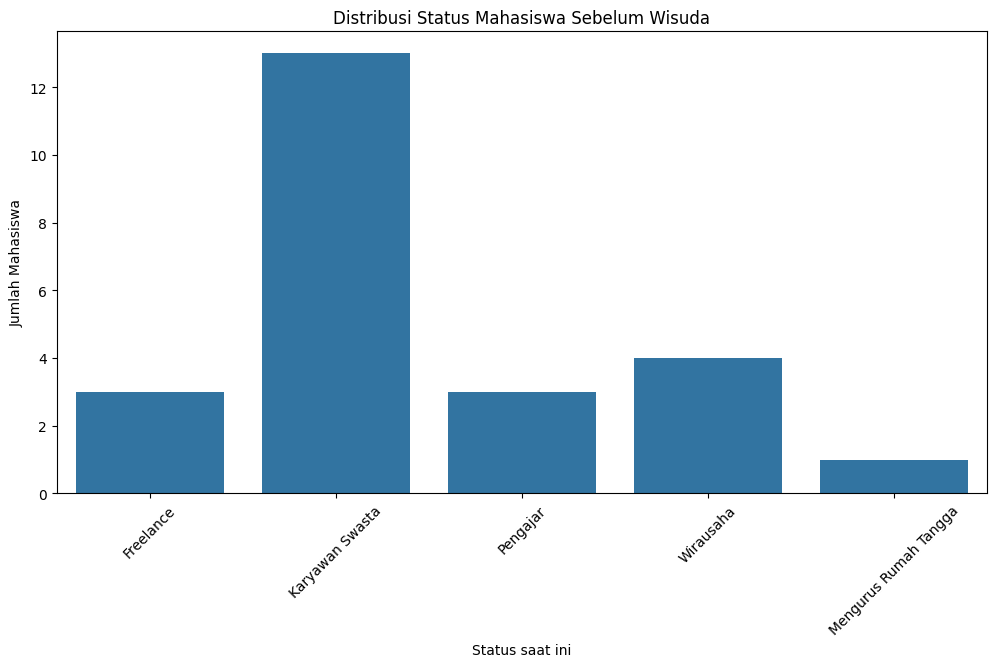

In [42]:
df3=df[df["selisih bulan"]<=0][df["status saat ini"] != 'Melamar Pekerjaan']
df3 =  df3[df3['status saat ini'].notna()]

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='status saat ini', data=df3)
plt.title('Distribusi Status Mahasiswa Sebelum Wisuda')
plt.xlabel('Status saat ini')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.show()

Dari visualisasi di atas kami dapat menyimpulkan:

**1.** **Sebagaian Besar Alumni Berstatus Menjadi Karyawan Swasta**
        
Dari grafik terlihat bahwa jumlah alumni yang bekerja sebagai Karyawan Swasta adalah yang tertinggi dibandingkan dengan status lainnya. Ini menunjukkan bahwa banyak lulusan yang memilih untuk bekerja di perusahaan swasta. Serta hal ini menunjukkan pula bahwa perusaan swasta mempunyai fleksibilitas yang membuat perusahaan bersedia menerima alumni yang belum menjalani wisuda.

**2.** **Jumlah Alumni yang Berwirausaha Masih Relatif Rendah**

Wirausaha berada di posisi kedua dalam jumlah, namun masih relatif sedikit dibandingkan karyawan swasta. Ini bisa mengindikasikan kurangnya minat atau dukungan bagi alumni yang ingin memulai usaha.


**3.** **Jumlah Alumni yang Berstatus Sebagai Penganjar dan Freelancer Juga Tidak Terlalu Banyak**

Dari grafik bisa dilihat bahwa jumlah alumni yang menjadi Freelance dan Pengajar tidak terlalu banyak, hal ini menunjukkan bahwa mungkin jalur ini kurang populer atau tidak terlalu dipromosikan kepada mahasiswa selama masa kuliah.

Dari insight di atas kami dapat merekondasikan;

**1.** **Pihak Universitas Bekerja Sama dengan Perusahaan**

Dikarenakan banyak alumni yang diterima bekerja di perusaahan swasta, maka ini bisa menjadi peluang bagi pihak universitas agar bisa bekerja sama dengan perusahaan melalui program magang, pelatihan pra-kerja, atau program rekruitmen.

**2.** **Mengembangkan Kurikulum Berbasis Industri di Setiap Program studi**

Untuk memastikan kesiapan mahasiswa, pihak universitas bisa mempertimbangkan untuk menyesuaikan kurikulum sesuai kebutuhan industri. Ini mencakup pengembangan keterampilan praktis dan pengenalan proyek-proyek nyata. Pihak universitas juga bisa melakukan peninjauan satiap satu/dua tahun terhadap kurikulum yang ada untuk mengevaluasi agar materi ajar tetap relevan dengan kebutuhan industri saat ini.

**3.** **Memfokuskan Mahasiswa pada Bimbingan Karier dan Soft Skills**

Untuk mendorong lebih banyak alumni bekerja sebelum wisuda, universitas perlu memberikan bimbingan karier, pelatihan soft skills, seperti wawancara kerja, komunikasi, dan manajemen waktu, yang akan berguna bagi mahasiswa dalam proses seleksi pekerjaan.

**4.** **Mendukung Mahasiswa yang Berminat di Bidang Wirausaha**

Meningkatkan dukungan bagi mahasiswa yang berminat berwirausaha melalui program pelatihan atau dan mentoring dari alumni atau profesional.

Berikut merupakan rekomendasi beberapa Perusahaan yang bisa dijadikan referensi untuk mahasiswa yang sedang mencari pekerjaan, karena terdapat alumni yang bekerja di perusahaan-perusahaan tersebut.

In [43]:
df3 = df3[df3["status saat ini"] == 'Karyawan Swasta']
df3 =  df3[df3["status saat ini"].notna()]
df3["perusahaan"].unique() # Rekomendasi perusahaan untuk mahasiswa, magang atau lainnya karena ada alumni yang dapat bekerja disitu

array(['Petrolab Services', 'PT. Maju Usaha Inovasi',
       'PT. Lotte Shopping Indonesia', 'PT. Sunindo Kookmin Best Finance',
       "Laznas PPPA Daarul Qur'an ", None, 'Kafe Kopi Sultan',
       'PT Gemilang Rizqi Efendi Development ', 'Tanatap Artisan , ',
       'Sekolah Tara Salvia', 'CV Kukche Mitra Sukses',
       'Perhimpunan Ahli Pertambangan Indonesia ',
       'PT. Satwa Medika Utama'], dtype=object)

### Visualisasi 2

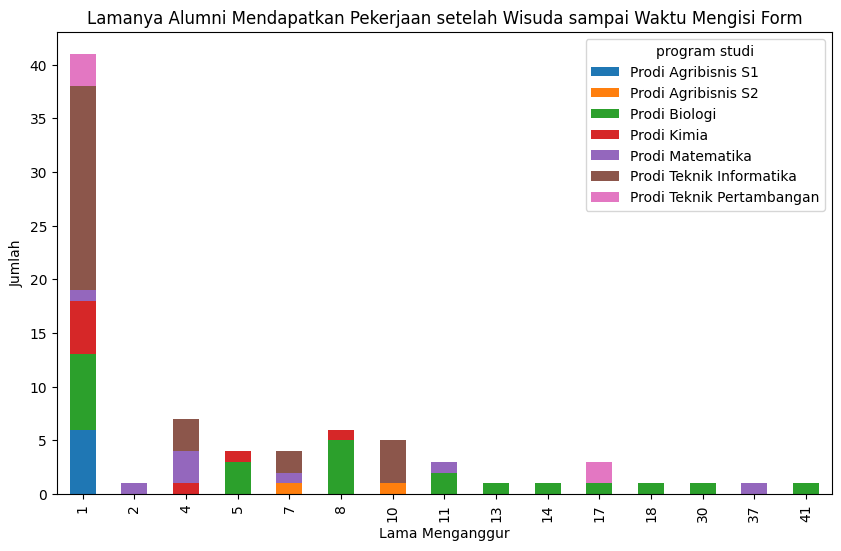

In [44]:
df2=df[df["waktu mendapatkan pekerjaan"]=='Belum mendapatkan pekerjaan']
df2=df2[df2["selisih bulan"]>0]
import matplotlib.pyplot as plt

# Crosstab untuk visualisasi
crosstab_data_alumni1 = pd.crosstab(df2["selisih bulan"], df2["program studi"])
crosstab_data_alumni1.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Lamanya Alumni Mendapatkan Pekerjaan setelah Wisuda sampai Waktu Mengisi Form')
plt.xlabel('Lama Menganggur')
plt.ylabel('Jumlah')
plt.show()


**Insight**
- Sebagian besar alumni baru (1 bulan lulus) yang belum bekerja sedari waktu wisuda hingga pengisian form berasal dari beberapa program studi, terutama dari Teknik Informatika, diikuti oleh Biologi dan Agribisnis S1.
- Terdapat variasi waktu pengangguran di antara program studi, menunjukkan adanya alumni yang mengalami pengangguran dalam waktu yang lebih lama setelah wisuda terutama Biologi.

**Rekomendasi**
- **Program Pelatihan untuk Meningkatkan Daya Saing**

  Untuk program studi dengan durasi pengangguran yang tinggi, universitas dapat menyediakan program pelatihan tambahan, seperti pengembangan soft skills atau program magang, guna membantu meningkatkan daya saing mahasiswa di dunia kerja.
- **Monitoring dan Penyesuaian Kurikulum**

  Melakukan monitoring dan evaluasi terhadap program studi dengan tingkat pengangguran yang tinggi untuk memahami skill apa yang mungkin belum terpenuhi oleh alumni. Hal ini dapat membantu program studi menyesuaikan kurikulum agar lebih sesuai dengan kebutuhan industri.
- **Kerja Sama dengan Industri**

  Universitas dapat memperluas kerja sama dengan perusahaan dan industri terkait untuk membuka peluang magang dan pekerjaan bagi mahasiswa dan alumni, sehingga mereka memiliki peluang lebih besar untuk memasuki dunia kerja setelah lulus.


### Visualisasi 3

<Figure size 1200x600 with 0 Axes>

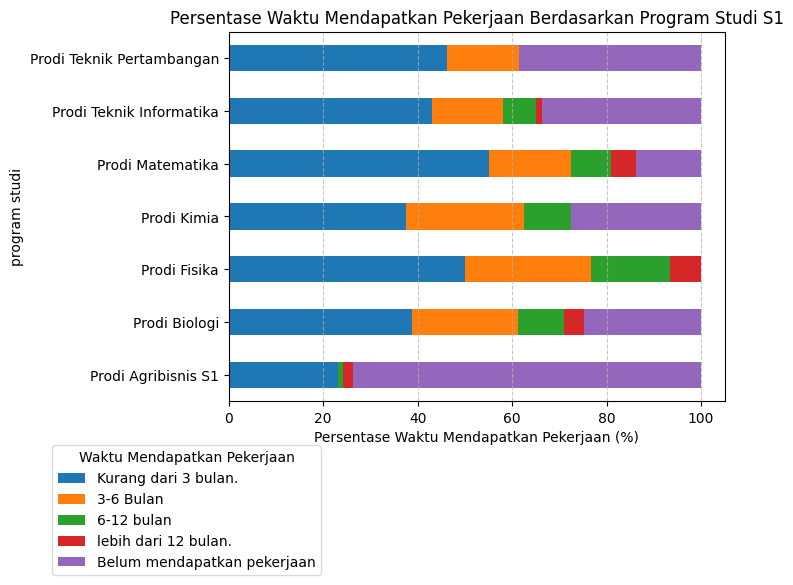

In [45]:
# Menghitung persentase Waktu Mendapatkan Pekerjaan pekerjaan per program studi S1
dfS1=df[df["program studi"]!='Prodi Agribisnis S2']
dfv2=dfS1[dfS1["waktu mendapatkan pekerjaan"]!="Tidak berencana mencari pekerjaan"]
WP_counts = dfv2.groupby(['program studi', 'waktu mendapatkan pekerjaan']).size().unstack()
WP_percentage = (WP_counts.div(WP_counts.sum(axis=1), axis=0) * 100)

# Reorder the columns of WP_percentage DataFrame
WP_percentage = WP_percentage[["Kurang dari 3 bulan.", "3-6 Bulan", "6-12 bulan", "lebih dari 12 bulan.", "Belum mendapatkan pekerjaan"]]

# Membuat palet warna
colors = sns.color_palette("tab10", WP_percentage.shape[1])  # Pilih warna berdasarkan jumlah kolom

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(12, 6))
WP_percentage.plot(kind='barh', stacked=True, color=colors)  # stacked=True agar batang setiap kategori terpisah
plt.title("Persentase Waktu Mendapatkan Pekerjaan Berdasarkan Program Studi S1")
plt.xlabel("Persentase Waktu Mendapatkan Pekerjaan (%)")
plt.ylabel("program studi")
plt.legend(title="Waktu Mendapatkan Pekerjaan", loc='upper right', bbox_to_anchor=(0.2, -0.1), framealpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insight**
- Prodi dengan Persentase tinggi Mendapatkan pekerjaan tercepat, Prodi matematika, memiliki persentase cukup besar yang mendapatkan pekerjaan dalam waktu kurang dari 3 bulan.

- Prodi dengan Persentase tinggi Belum Mendapatkan Pekerjaan, seperti Prodi Agribisnis S1 memiliki persentase tinggi dalam kategori 'Belum mendapatkan pekerjaan'. Ini menunjukkan tantangan dalam mendapatkan pekerjaan untuk lulusan dari program studi ini.

- Distribusi Waktu Mendapatkan Pekerjaan Berbeda-Beda. Setiap program studi memiliki distribusi waktu yang berbeda untuk mendapatkan pekerjaan, yang mungkin terkait dengan permintaan industri, keterampilan yang dimiliki, atau tingkat persaingan di bidang tersebut.


**Rekomendasi**
- Peningkatan Keterampilan dan Relevansi Kurikulum. Untuk program studi dengan tingkat waktu lama dalam mendapatkan pekerjaan, dapat disarankan untuk meninjau kembali kurikulum dan memastikan keterampilan yang diberikan sesuai dengan kebutuhan industri.

- Program Magang dan Kerja Sama Industri. Prodi dengan penyerapan kerja yang lambat dapat meningkatkan kerja sama dengan industri, misalnya melalui program magang yang dapat memberikan pengalaman praktis kepada mahasiswa dan meningkatkan peluang kerja mereka setelah lulus.

- Promosi Program Studi dengan Waktu Cepat Mendapatkan Pekerjaan. Prodi seperti Matematika memiliki waktu mendapatkan pekerjaan relatif cepat, dapat dipromosikan lebih lanjut untuk menarik calon mahasiswa baru.

### visualisasi 4

In [46]:
df['memiliki wirausaha'] = (df['bidang wirausaha'].notna())
df['memiliki wirausaha'] = df['memiliki wirausaha'].replace({True: 'Ya', False: 'Tidak'})
df["memiliki wirausaha"].value_counts()

,count
memiliki wirausaha,
Tidak,403
Ya,31


In [47]:
dfv4 = df[df['kesesuaian kurikulum']<=3]

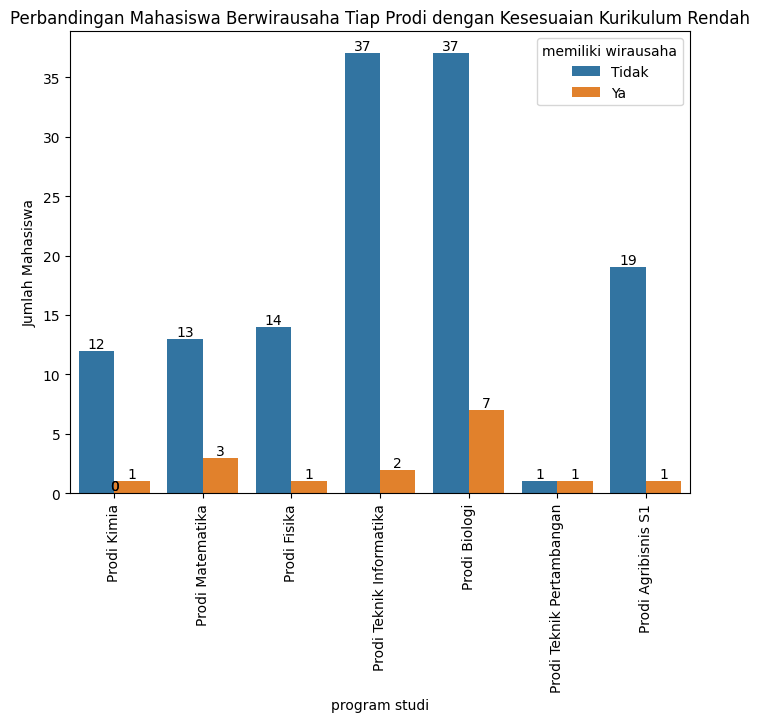

In [55]:
# Membuat countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dfv4[dfv4["program studi"]!="Prodi Agribisnis S2"], x='program studi', hue='memiliki wirausaha')
# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.title("Perbandingan Mahasiswa Berwirausaha Tiap Prodi dengan Kesesuaian Kurikulum Rendah")
plt.xlabel("program studi")
plt.ylabel("Jumlah Mahasiswa")
plt.xticks(rotation=90)
plt.show()

**Berdasarkan data persebaran mahasiswa diatas bisa kita ambil insight,yaitu:**

Alumni yang memiliki wirausaha tergolong sangat sedikit, salah satu faktor yang menyebabkan ini terjadi adalah karena kurangnya edukasi lebih lanjut tentang atau cara menjadi wirausaha yang baik dan benar, kurangnya kepercayaan diri serta terbatasnya pengetahuan mengenai memulai cara wirausaha, dan kurang edukasi tentang seberapa pentingnya wirausaha yang bisa membuka lapangan pekerjaan bagi orang lain.

**Maka dari itu kita merekomendasikan:**
1. Perlu diadakan seminar mengenai tata cara berwirausaha bisa Bersama alumni  maupun praktisi
2. Menyisipkan mata kuliah tentang wirausaha yang mencakup konsep dasar, perencanaan bisnis, pemasaran, hingga manajemen keuangan, bisa membantu mahasiswa memahami dasar-dasar bisnis dan bagaimana cara memulainya
3. Melibatkan mahasiswa dalam studi kasus dan proyek yang meniru tantangan nyata yang dihadapi pengusaha dapat memberikan pengalaman langsung
3. Mengadakan kompetisi wirausaha di program studi tersebut
4. Memberikan dukungan secara finansial bagi mereka yang berani dan memiliki keinginan untuk mencoba dan mengembangkan bisnisnya

### visualisasi 5

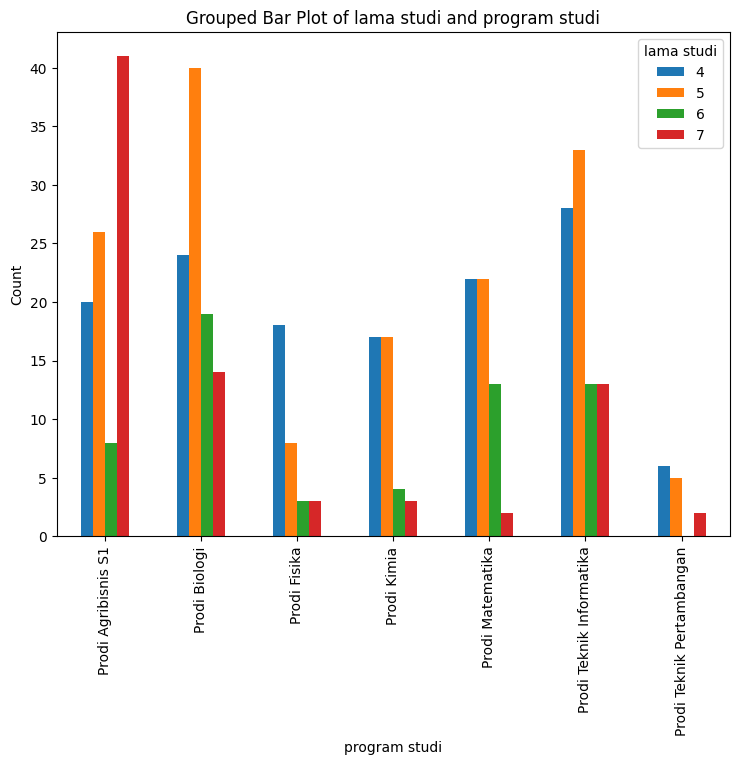

In [49]:
# Assuming 'dfS1' is your DataFrame
counts = dfS1.groupby(["program studi","lama studi"]).size().unstack()

# Create the grouped bar plot using pandas plot function
counts.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Plot of lama studi and program studi')
plt.xlabel('program studi')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title='lama studi')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [50]:
df[df["program studi"]=="Prodi Agribisnis S1"]["lama studi"].value_counts()

,count
lama studi,
7,41
5,26
4,20
6,8


**Insight**
- Distribusi lama studi mahasiswa di berbagai program studi menunjukkan variasi yang signifikan, di mana mayoritas mahasiswa lulus dalam waktu 4 atau 5 tahun. Ini menunjukkan bahwa sebagian besar mahasiswa lulus tepat waktu atau hanya mengalami sedikit keterlambatan.
- Terlihat bahwa lama studi 5 tahun menjadi waktu yang paling umum di beberapa program studi, seperti Teknik Informatika dan Biologi. Namun, khusus di Agribisnis, terdapat jumlah mahasiswa yang cukup banyak (41 dari 95 alumni) dengan lama studi hingga 7 tahun. Hal ini mungkin dipengaruhi oleh beberapa faktor, seperti kesulitan menyelesaikan tugas akhir atau kebutuhan mengulang mata kuliah yang belum lulus.

**Rekomendasi**
- **Evaluasi Faktor Penyebab lama studi**

  Untuk program studi dengan rata-rata lama studi lebih dari 4 tahun, terutama di Agribisnis, disarankan untuk mengevaluasi faktor-faktor yang menyebabkan mahasiswa memerlukan waktu lebih lama untuk lulus. Evaluasi ini bisa mencakup tinjauan terhadap kurikulum, metode pembelajaran, dan tingkat kesulitan mata kuliah.
- **Penerapan Program MBKM**

  Fakultas dapat memperkenalkan program Merdeka Belajar Kampus Merdeka (MBKM) yang memungkinkan mahasiswa mendapatkan pengalaman belajar di luar kampus. Terutama jika SKS dari program MBKM ini dapat dikonversi, maka mahasiswa juga akan lebih mudah menyelesaikan studi tepat waktu.
- **Penawaran Semester Pendek**
  Fakultas dapat menawarkan semester pendek untuk mahasiswa yang membutuhkan pengulangan mata kuliah atau untuk mata kuliah yang belum mereka ambil, sehingga mereka dapat menghindari keterlambatan dalam penyelesaian studi.

### Visualisasi 6

In [51]:
df['kurikulum'] = (df["kesesuaian kurikulum"].isin([4,5]))
df['kurikulum'] = df['kurikulum'].replace({True: 'Sesuai', False: 'Netral atau tidak sesuai'})

<Figure size 1200x600 with 0 Axes>

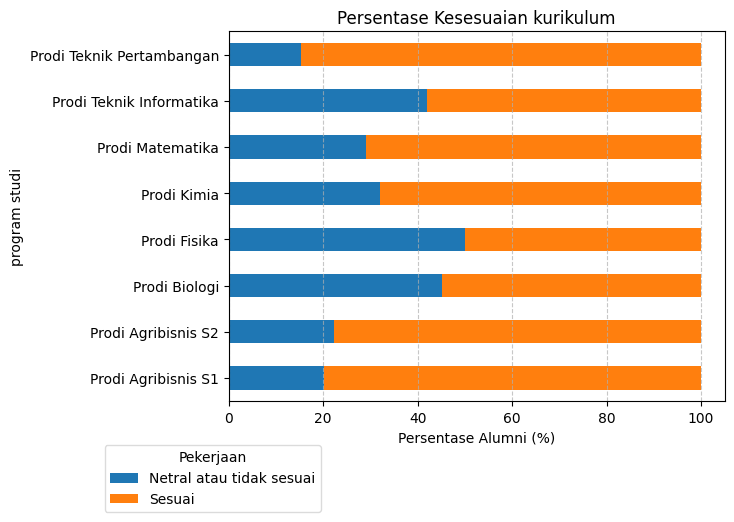

In [52]:
# Menghitung persentase Waktu Mendapatkan Pekerjaan pekerjaan per program studi S1
WP_counts = df[df["tahun masuk uin jakarta"].isin([2020,2019,2018,2017])].groupby(['program studi', "kurikulum"]).size().unstack()
WP_percentage = (WP_counts.div(WP_counts.sum(axis=1), axis=0) * 100)

# Membuat palet warna
colors = sns.color_palette("tab10", WP_percentage.shape[1])  # Pilih warna berdasarkan jumlah kolom

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(12, 6))
WP_percentage.plot(kind='barh', stacked=True, color=colors)  # stacked=True agar batang setiap kategori terpisah
plt.title("Persentase Kesesuaian kurikulum")
plt.xlabel("Persentase Alumni (%)")
plt.ylabel("program studi")
plt.legend(title="Pekerjaan", loc='upper right', bbox_to_anchor=(0.2, -0.1), framealpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

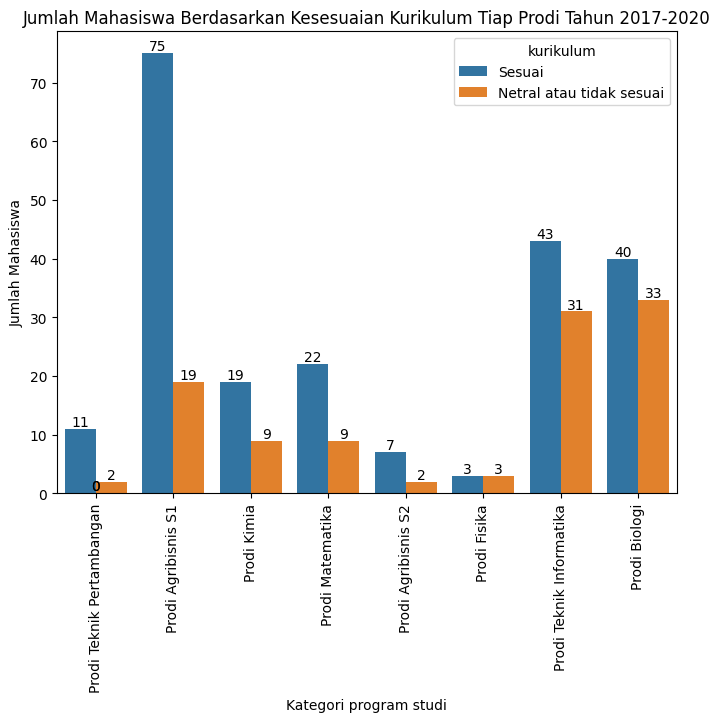

In [53]:


# Membuat countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df[df["tahun masuk uin jakarta"].isin([2020,2019,2018,2017])], x='program studi', hue="kurikulum")
# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.title("Jumlah Mahasiswa Berdasarkan Kesesuaian Kurikulum Tiap Prodi Tahun 2017-2020")
plt.xlabel("Kategori program studi")
plt.ylabel("Jumlah Mahasiswa")
plt.xticks(rotation=90)
plt.show()

**Berdasarkan gambar kesesuaian kurikulum tahun 2017-2020 kita bisa lihat bahwa diatas kita bisa mengambil insight, yaitu:**

Program studi agribisnis S1 memiliki rasion perbandingan antara kesesuaian dan netral/tidak sesuai cukup tinggi yang dimana mengindikasikan bahwa kurikulum mereka selama beberapa tahun terakhir sesuai dengan tren industri yang ada dan prospek kerja mereka akan tetapi rata - rata lama kuliah mereka cukup lama ini mungkin karena pihak program studi lebih mengedepankan kurikulum yang sesuai dengan target kerja dari program studi mereka yang menyebabkan tingkat kesulitan kurikulum mereka lebih tinggi agar mahasiswa mereka lebih siap saat turun ke dunia industri, akan tetapi kita bisa melakukan langkah-langkah seperti visualisasi diatas agar mempercepat lulus mereka tanpa mengurangi esensi kurikulum yang sudah baik, dan untuk program studi fisika, TI, dan biologi bisa kita lihat bahwa mereka memiliki perbandingan yang cukup seimbang atau bahkan seimbang

**Maka dari itu kita merekomendasikan:**
1. Program studi yang perbandingan nya cenderung seimbang perlu meningkatkan kurikulum mereka dengan cara pihak program studi harus mengkaji ulang secara berkala kurikulumnya agar dapat mengikuti tren industri yang sedang berkembang dengan bisa dengan melakukan FGD bersama alumni terkait kurikulum yang sesuai untuk prodi tersebut
2. Meningkatkan fasilitas dan sumber belajar (seperti laboratorium, bahan ajar, atau akses ke perangkat lunak) agar sejalan dengan kebutuhan modern, mengundang pakar atau praktisi dari dunia industri untuk meninjau kurikulum. Mereka dapat memberikan wawasan mengenai tren terbaru yang mungkin belum terakomodasi di kurikulum yang ada

In [54]:
df.columns

Index(['timestamp', 'tahun masuk uin jakarta', 'waktu mendapatkan pekerjaan',
       'status saat ini', 'tahun wirausaha', 'bidang wirausaha', 'perusahaan',
       'posisi', 'penghasilan', 'universitas', 'tahun masuk studi lanjut',
       'program studi lanjutan', 'kesesuaian kurikulum',
       'kesesuaian bidang ilmu', 'saran', 'program studi', 'lama studi',
       'tahun-bulan wisuda', 'selisih bulan', 'memiliki wirausaha',
       'kurikulum'],
      dtype='object')